In [1]:
import sys
import numpy as np
!{sys.executable} -m pip install nmslib

In [2]:
import matplotlib.pyplot as plt
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
import os
from skimage import io
input_dir = "../../../kaggle-airbus/input"
test = os.listdir(input_dir+'/test')
ignore_list = ['13703f040.jpg','14715c06d.jpg','33e0ff2d5.jpg',
               '4d4e09f2a.jpg','877691df8.jpg', '8b909bb20.jpg',
               'a8d99130e.jpg','ad55c3143.jpg','c8260c541.jpg',
               'd6c7f17c7.jpg','dc3e7c901.jpg','e44dffe88.jpg',
               'ef87bad36.jpg', 'f083256d8.jpg']

for image_id in test:
    if image_id not in ignore_list:
        image = io.imread(input_dir+'/test/'+image_id)
        dims = image.shape
        if dims != (768, 768, 3):
            print(dims)

In [ ]:
import numpy as np
f_masks = np.load('./filtered_masks.npy')

shape=(768, 768)
i = 0
print(len(f_masks))
#sub_test1 = pd.read_csv('./submission_test1.csv')
for i, mask_rle in enumerate(f_masks):
    if mask_rle:
        s = mask_rle[0].split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
        sorted_starts = sorted(starts)
        not_ascending = sorted_starts != starts
        if not_ascending.any():
            print(i)
        overlaps = starts + lengths
        possible_overlap = overlaps[:-1] - sorted_starts[1:]
        is_overlapping = possible_overlap >= 0
        if is_overlapping.any():
            print(i)
        

In [237]:
import pandas as pd
sub_test1 = pd.read_csv('./submission_test4.csv')
#print(len(sub_test1['ImageId']))
#for name in sub_test1['ImageId']
#sub_test1[sub_test1.duplicated('ImageId', keep=False)]
intersection = False
nos = []
#masks = np.load('./allmasks.npy')
masks = np.load('filtered_masks_rle_no_overlap.npy')
print(len(masks))
for index, row in sub_test1.iterrows():
#for index, row in enumerate(masks):
    #if row:
    if index == len(sub_test1) - 12:
        print(row['ImageId'])
    if type(row['EncodedPixels']) is str:
        #print(type(row['EncodedPixels']) is str)
        encoded_strings = row['EncodedPixels'].split('\n')
        #encoded_strings = row[0].split('\n')
        encoding_ranges = []
        for s in encoded_strings:
            s = s.split()
            starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
            sorted_starts = sorted(starts)
            not_ascending = sorted_starts != starts
            if not_ascending.any():
                print('ascend')
            #if index == 1:
            #    print(row['EncodedPixels'])
                print(index)
            overlaps = starts + lengths
            possible_overlap = overlaps[:-1] - sorted_starts[1:]
            is_overlapping = possible_overlap >= 0
            zipped = zip(starts, starts+lengths)
            encoding_ranges.append([ range(start, finish) for (start, finish) in zipped])
            if is_overlapping.any():
                print('overlap')
            #print(row['EncodedPixels'])
                print(index)
        if encoding_ranges:
            #Much computation...
            checked_pairs = []
            for i, range_set_1 in enumerate(encoding_ranges):
                for r1 in range_set_1:
                    for o_i, range_set_2 in enumerate(encoding_ranges):
                        #print(range_set_2)
                        #print(sorted([i, o_i]))
                        #print(sorted([i, o_i]) in checked_pairs)
                       # print(sorted((i, o_i)) in checked_pairs)
                        #sorted((i, o_i)) in checked_pairs
                        if o_i == i or sorted([i, o_i]) in checked_pairs:
                            continue
                        for r2 in range_set_2:
                            r1_set = set(r1)
                            if r1_set.intersection(r2):
                                if index not in nos:
                                    nos.append(index)
                                print('intersection between masks', i, o_i, 'for entry', index)
                                print(r2)
                                print(r1)
                                #intersection = True
                            if intersection:
                                break
                        if intersection:
                            break
                    checked_pairs.append(sorted([i, o_i]))
                    if intersection:
                        break
                if intersection:
                    break
        if intersection:
            break
                    
print(nos)        

88486
207d91f6e.jpg
[]


In [143]:
error_1 = sub_test1.iloc[1]['EncodedPixels']
error_f = f_masks[1][0]
s = error_1.split()
starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
starts = starts[::2]
sorted_starts = sorted(starts)
not_ascending = sorted_starts != starts
print(starts)
print(sorted_starts)
print('-------------------------------------------------------')
s = error_f.split()
starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
starts = starts[::2]
sorted_starts = sorted(starts)
not_ascending = sorted_starts != starts
print(starts)
print(sorted_starts)

[26870 28397 29925 31448 32969 34504 36040 37576 39112 40648 42184 43721
 45272]
[26870, 28397, 29925, 31448, 32969, 34504, 36040, 37576, 39112, 40648, 42184, 43721, 45272]
-------------------------------------------------------
[26870 28397 29925 31448 32969 34504 36040 37576 39112 40648 42184 43721
 45272]
[26870, 28397, 29925, 31448, 32969, 34504, 36040, 37576, 39112, 40648, 42184, 43721, 45272]


In [195]:
a = [1, 54, 265, 318, 642, 793, 817, 861, 884, 1230, 1277, 1412, 1450, 1647, 1659, 1768, 1877, 1993, 2097, 2139, 2194, 2199, 2275, 2289, 2467, 2563, 2589, 2693, 2901, 2963, 3166, 3370, 3517, 3534, 3564, 3617, 3832, 3988, 4186, 4238, 4397, 4432, 4569, 4575, 4617, 4654, 4856, 5070, 5216, 5224, 5255, 5265, 5378, 5519, 5629, 5654, 5725, 5763, 6012, 6090, 6167, 6182, 6195, 6218, 6284, 6523, 6649, 6770, 6941, 7135, 7149, 7199, 7248, 7517, 7520, 7618, 7694, 7764, 7853, 7871, 8211, 8359, 8453, 8456, 8507, 8542, 8599, 8803, 8884, 8927, 8993, 9290, 9404, 9763, 9827, 9844, 9901, 10005, 10013, 10273, 10417, 10447, 10479, 10515, 10806, 10869, 11118, 11119, 11245, 11496, 11575, 11606, 11635, 12047, 12052, 12110, 12136, 12173, 12556, 12766, 12862, 12917, 13046, 13055, 13098, 13194, 13289, 13417, 13574, 13592, 13685, 13959, 14063, 14326, 14391, 14485, 14558, 14704, 14932, 15016, 15040, 15196, 15382, 15519, 15615, 15902, 15939, 16114, 16123, 16200, 16298, 16394, 16418, 16596, 16601, 16618, 16632, 16742, 16810, 16928, 17060, 17092, 17215, 17310, 17491, 17869, 18536, 18538, 18576, 18598, 18626, 18922, 19070, 19147, 19416, 19674, 19928, 19935, 19938, 20002, 20103, 20113, 20564, 20687, 20717, 20785, 20883, 21024, 21033, 21089, 21163, 21212, 21249, 21425, 21725, 21734, 21772, 21795, 21878, 22103, 22144, 22324, 22331, 22379, 22487, 22543, 22613, 22812, 22833, 22875, 22914, 22922, 23239, 23260, 23308, 23330, 23337, 23344, 23529, 23749, 23933, 24287, 24622, 24679, 24765, 24804, 24933, 24990, 25350, 25488, 25527, 25731, 25831, 25856, 26001, 26072, 26491, 26511, 26535, 26582, 26640, 26712, 26777, 26880, 27395, 27466, 27545, 27946, 28069, 28114, 28164, 28492, 28737, 28930, 28961, 29091, 29421, 29581, 29685, 29745, 29980, 30088, 30204, 30319, 30539, 30685, 30815, 30864, 31148, 31209, 31293, 31296, 31459, 31729, 31783, 31804, 31931, 31992, 32058, 32111, 32176, 32339, 32541, 32681, 32846, 32928, 33332, 33438, 33563, 33815, 34017, 34630, 34742, 34860, 34962, 35040, 35195, 35284, 35524, 35545, 35700, 35899, 35918, 35956, 36056, 36154, 36182, 36193, 36291, 36471, 36493, 36562, 36581, 36704, 36725, 36818, 37049, 37086, 37087, 37425, 37438, 37644, 37787, 37847, 38553, 38720, 38950, 39088, 39634, 39637, 39748, 39820, 40187, 40285, 40393, 40430, 40679, 40686, 40922, 40932, 41224, 41354, 41420, 41482, 41504, 41700, 41765, 41766, 41883, 41934, 42036, 42060, 42144, 42177, 42185, 42275, 42301, 42304, 42423, 42553, 42594, 42643, 42652, 42915, 42996, 43160, 43246, 43303, 43331, 43446, 43551, 43573, 43649, 43751, 43826, 43952, 43997, 44096, 44265, 44270, 44568, 45015, 45072, 45146, 45294, 45308, 45345, 45355, 45804, 46234, 46273, 46285, 46308, 46496, 46531, 46649, 46664, 46707, 46815, 47032, 47096, 47300, 47370, 47398, 47438, 47443, 47568, 47570, 47687, 47878, 47889, 48060, 48168, 48207, 48254, 48677, 48799, 48819, 49171, 49203, 49398, 49658, 49741, 49823, 49893, 50006, 50024, 50047, 50139, 50209, 50221, 50503, 50623, 50737, 50860, 50912, 50931, 50932, 50973, 51156, 51433, 51489, 51501, 51774, 51901, 52238, 52248, 52567, 52584, 52789, 52891, 53079, 53339, 53547, 53558, 53663, 53807, 53844, 53879, 53899, 53936, 54075, 54116, 54134, 54170, 54273, 54301, 54388, 54887, 54911, 54936, 55030, 55127, 55134, 55259, 55345, 55393, 55411, 55507, 55589, 55594, 55931, 55936, 56050, 56141, 56212, 56354, 56391, 56642, 56671, 56930, 56932, 57016, 57035, 57070, 57360, 57471, 57665, 57776, 57841, 58150, 58383, 58539, 58598, 58708, 58740, 58760, 58854, 58994, 59009, 59029, 59096, 59351, 59381, 59417, 59443, 59465, 59468, 59746, 59770, 59989, 60638, 60671, 60763, 60787, 60822, 61262, 61667, 61754, 61862, 61916, 62180, 62634, 62724, 62755, 62908, 62947, 63015, 63146, 63626, 63632, 63640, 63665, 63780, 63785, 63857, 64087, 64290, 64457, 64468, 64482, 64559, 64562, 64699, 64795, 64987, 65022, 65049, 65102, 65246, 65289, 65505, 65526, 65551, 65660, 65761, 65838, 65863, 65900, 65958, 65992, 66006, 66045, 66144, 66178, 66377, 66421, 66429, 66474, 66552, 66579, 66698, 66775, 66912, 67050, 67221, 67235, 67236, 67248, 67300, 67375, 67424, 67509, 67569, 67918, 68234, 68457, 68472, 68535, 69149, 69280, 69363, 69390, 69795, 69860, 69880, 69889, 69895, 69989, 70007, 70033, 70034, 70217, 70542, 70579, 70938, 70989, 71031, 71109, 71169, 71216, 71356, 71800, 71858, 72300, 72333, 72506, 72537, 72591, 72665, 72728, 72928, 73040, 73093, 73110, 73331, 73477, 73664, 74030, 74125, 74159, 74169, 74384, 74389, 74390, 74502, 74645, 75253, 75369, 75485, 75575, 75657, 75712, 75773, 75913, 76087, 76206, 76583, 76585, 76806, 76999, 77068, 77599, 77641, 77757, 77830, 77898, 77969, 77973, 78069, 78085, 78142, 78227, 78587, 78718, 78863, 78866, 79086, 79148, 79162, 79508, 79592, 79767, 79787, 80317, 80532, 80606, 80825, 81073, 81118, 81353, 81469, 81489, 81766, 81779, 81872, 81925, 82095, 82124, 82189, 83040, 83113, 83296, 83588, 83655, 83677, 83704, 83812, 83861, 83876, 83985, 84092, 84260, 84335, 84347, 84364, 84414, 84435, 84509, 84724, 84869, 84927, 85136, 85147, 85159, 85165, 85196, 85328, 85394, 85475, 85590, 85685, 85731, 85784, 85817, 86035, 86450, 86809, 86906, 86918, 87048, 87166, 87398, 87452, 87537, 87988, 88041, 88087, 88308, 88317, 88376, 88440]
print(len(a))

752


In [3]:
def resultFilterMaxScore(r, scores_threshold=0.9, overlapThresh=0.5):
    temp = r['scores']
    filt_ids = temp > scores_threshold
    pick = []
    boxes = r['rois']
    y1 = boxes[:,0]
    x1 = boxes[:,1]
    y2 = boxes[:,2]
    x2 = boxes[:,3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    #idxs = np.argsort(y2)
    idxs = np.argsort(r['scores'])
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        print('current index looked at score is', temp[i])
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
 
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
 
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
 
        # delete all indexes from the index list that have
        overlapping = np.where(overlap > overlapThresh)[0]
        print(overlapping)
        delete_candidates = np.concatenate(([last], np.where(overlap > overlapThresh)[0]))
        #print(delete_candidates)
        #print(idxs)
        #print(idxs)
        
        #curr_score = 0
        #nms_index = -1
        #reposition = -1
        #print(temp[idxs[delete_candidates]])
        #print(delete_candidates)
        #for candidate in delete_candidates:
        #    if temp[idxs[candidate]] > curr_score:
        #        reposition = candidate
        #        nms_index = idxs[candidate]
        #        curr_score = temp[idxs[candidate]]
                
        #print(reposition)
        #print(last)
        #if reposition != last:
        #    print(reposition)
        #    last = reposition
        #    i = idxs[last]
        #    
        #    xx1 = np.maximum(x1[i], x1[idxs[:last]])
        #    yy1 = np.maximum(y1[i], y1[idxs[:last]])
        #    xx2 = np.minimum(x2[i], x2[idxs[:last]])
        #    yy2 = np.minimum(y2[i], y2[idxs[:last]])
 
            # compute the width and height of the bounding box
        #    w = np.maximum(0, xx2 - xx1 + 1)
        #    h = np.maximum(0, yy2 - yy1 + 1)
 
            # compute the ratio of overlap
         #   overlap = (w * h) / area[idxs[:last]]
 
         #   delete_candidates = np.concatenate(([last], np.where(overlap > overlapThresh)[0]))
         #   print(delete_candidates)
         #   pick.append(nms_index)
         #   idxs = np.delete(idxs, delete_candidates)
         #   print(idxs)
        #else:
        pick.append(i)
        idxs = np.delete(idxs, delete_candidates)
        print('---------------------------')
        #pick.append(i)

    # return only the bounding boxes that were picked using the
    # integer data type
    filt_mask = np.zeros(len(filt_ids), dtype=bool)
    filt_mask[pick] = True
    filt_ids = np.logical_and(filt_ids, filt_mask)
    return filt_ids
    #mask = r['masks'][:,:,filt_ids]
    #return mask

In [5]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

input_dir = "../../../kaggle-airbus/input"
class ShipsConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "ships"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 768
    IMAGE_MAX_DIM = 768

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
class InferenceConfig(ShipsConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")

model_path = '/home/ubuntu/Mask_RCNN/logs/ships20180820T2119/mask_rcnn_ships_0002.h5'#model.find_last()
model_path = '/home/ubuntu/Mask_RCNN/logs/ships20180821T2110/mask_rcnn_ships_0140.h5'

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Using TensorFlow backend.


Loading weights from  /home/ubuntu/Mask_RCNN/logs/ships20180821T2110/mask_rcnn_ships_0140.h5
Re-starting from epoch 140


88500
9114e01a0.jpg
9114e01a0.jpg


/home/ubuntu/venv/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[0.99715793 0.99572515 0.98128396 0.9698883  0.963445   0.9410422
 0.889707   0.8528148  0.83693635 0.8327471  0.82091665 0.8153739
 0.81504226 0.7887914  0.77061266 0.76399434]
----------
current index looked at score is 0.99715793
[]
---------------------------
current index looked at score is 0.99572515
[]
---------------------------
current index looked at score is 0.98128396
[6]
---------------------------
current index looked at score is 0.9698883
[10]
---------------------------
current index looked at score is 0.9410422
[]
---------------------------
current index looked at score is 0.889707
[]
---------------------------
current index looked at score is 0.8528148
[2 4]
---------------------------
current index looked at score is 0.83693635
[]
---------------------------
current index looked at score is 0.82091665
[0]
---------------------------
current index looked at score is 0.81504226
[]
---------------------------
current index looked at score is 0.77061266
[]
------------

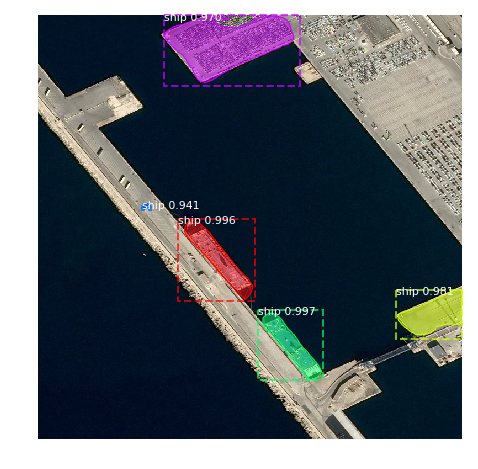

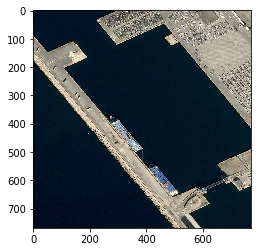

In [6]:
import os
test = os.listdir(input_dir+'/test')
import skimage
print(len(test))
# -32 is good example
image_id = test[-20]
print(image_id)
image = skimage.io.imread(input_dir+'/test/'+image_id)

print(image_id)
results = model.detect([image], verbose=0)


r = results[0]
print(r['scores'])
print('----------')
filt_ids = resultFilterMaxScore(r, scores_threshold=0.9, overlapThresh=0)
print(filt_ids)

visualize.display_instances(image, r['rois'][filt_ids], r['masks'][:,:,filt_ids], r['class_ids'][filt_ids], 
                            ['BG', 'ship'], r['scores'][filt_ids], ax=get_ax())
plt.figure()
plt.imshow(image)

-12
-------------------------------------------


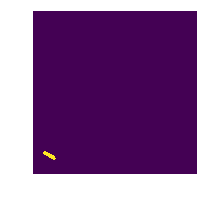

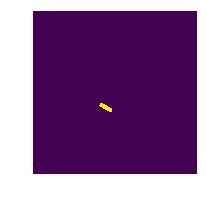

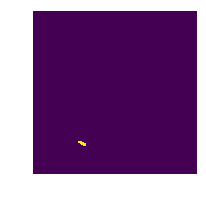

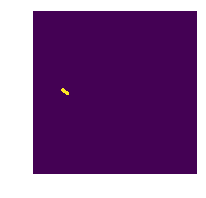

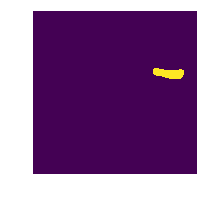

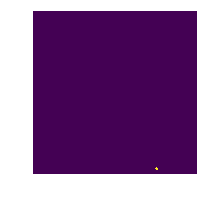

-13
-------------------------------------------


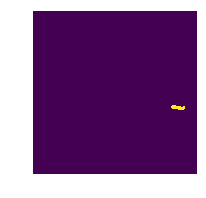

-16
-------------------------------------------


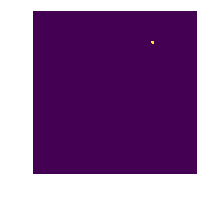

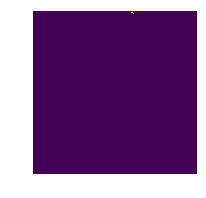

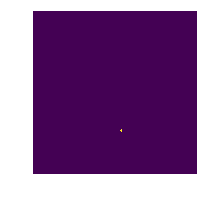

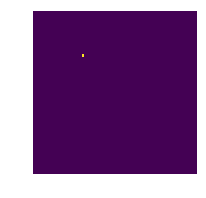

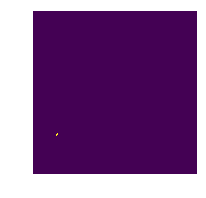

-17
-------------------------------------------


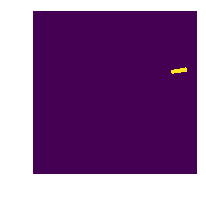

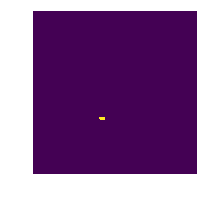

-18
-------------------------------------------


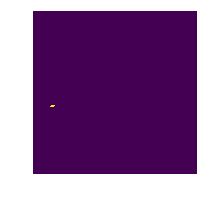

-20
-------------------------------------------


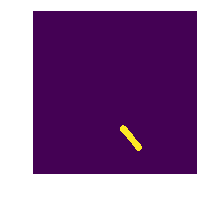

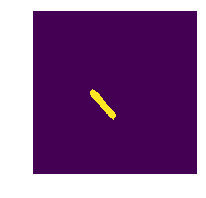

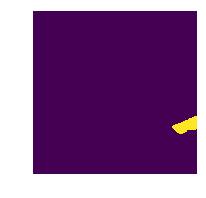

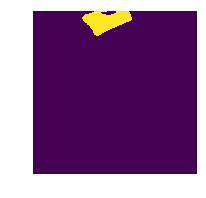

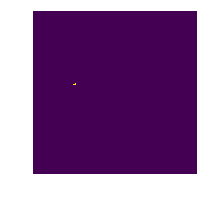

-23
-------------------------------------------


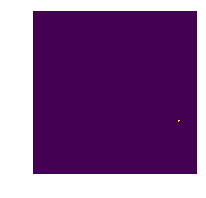

-25
-------------------------------------------


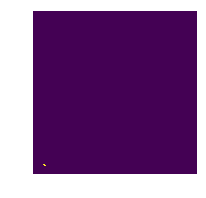

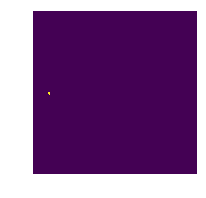

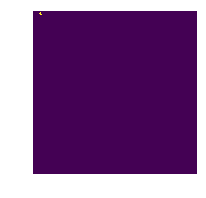

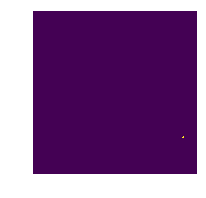

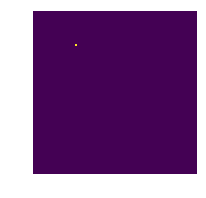

-30
-------------------------------------------


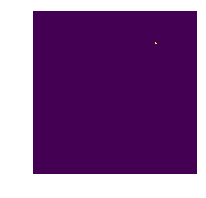

-32
-------------------------------------------


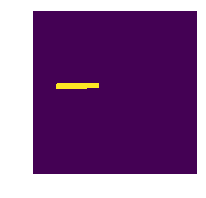

-34
-------------------------------------------


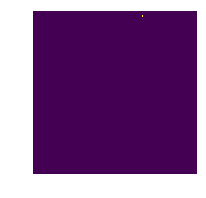

-37
-------------------------------------------


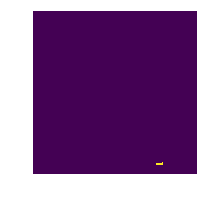

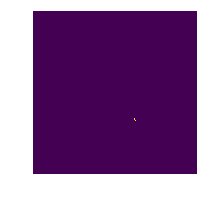

-39
-------------------------------------------


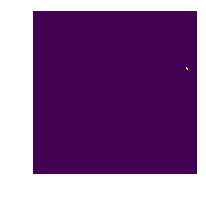

-41
-------------------------------------------


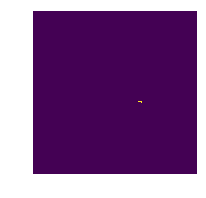

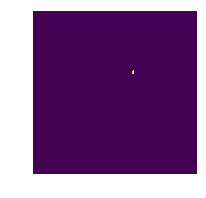

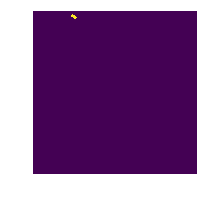

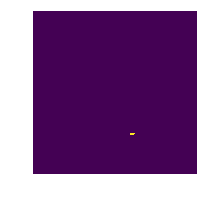

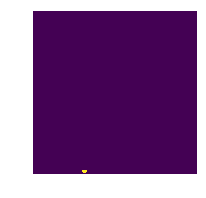

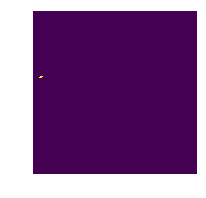

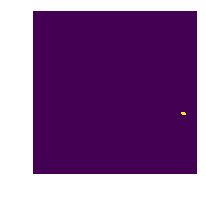

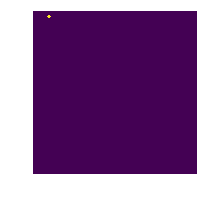

-42
-------------------------------------------


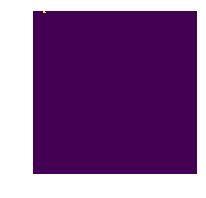

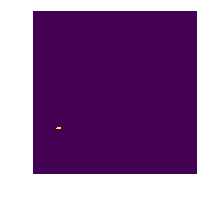

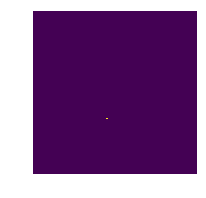

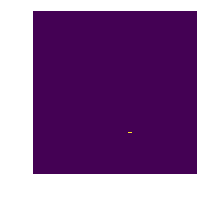

-46
-------------------------------------------


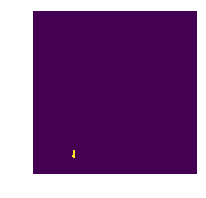

KeyboardInterrupt: 

In [3]:
from nms import *
from mrcnn import visualize
masks = np.load('./filtered_masks_rle_no_overlap.npy')
#print(len(masks))
for i, mask in enumerate(masks):
    #print(mask)
    mask = masks[-i-1]
    if mask:
        print(-i-1)
        print('-------------------------------------------')
        #encoded_strings = mask[0].split('\n')
        encoded_strings = mask
        for ec in encoded_strings:
            m = rle_decode(ec)
            visualize.display_images([m])